In [216]:
import pandas as pd
import numpy as np
import os 

#visualization
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline



#ML
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import ensemble, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from catboost import CatBoostClassifier


import warnings
warnings.filterwarnings('ignore')
from time import time
from concurrent.futures import ThreadPoolExecutor

In [2]:
#change working directory
os.chdir("D:/MiTh-solved")

In [3]:
#Training Data
train_data_ID = pd.read_csv("Train-1542969243754.csv", sep=",", keep_default_na=True,na_filter=True,
                  na_values="'', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'")

train_data_ClaimDetails= pd.read_csv("Train_ClaimDetails-1542969243754.csv", sep=",", keep_default_na=True,na_filter=True,
                  na_values=" '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#' ")
 
train_data_PDemography= pd.read_csv("Train_Policy_Demographics-1542969243754.csv", sep=",", keep_default_na=True,na_filter=True,
                  na_values=" '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'")
 
train_data_ID1 = pd.read_csv("Train-1542969243754.csv", sep=",", keep_default_na=False,
                  na_values="'', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'")

train_data_ClaimDetails1= pd.read_csv("Train_ClaimDetails-1542969243754.csv", sep=",", keep_default_na=False,
                  na_values=" '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#' ")
 
train_data_PDemography1= pd.read_csv("Train_Policy_Demographics-1542969243754.csv", sep=",", keep_default_na=True,
                  na_values=" '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'")
 


In [4]:
#test Data
test_data_ID = pd.read_csv("predictions-1542969243754.csv", sep=",", keep_default_na=True, na_filter=True,
                  na_values=" '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#' ")

test_data_ClaimDetails= pd.read_csv("Test_ClaimDetails-1542969243754.csv", sep=",", keep_default_na=True,na_filter=True,
                  na_values=" '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'")

test_data_PDemography= pd.read_csv("Test_Policy_Demographics-1542969243754.csv", sep=",", keep_default_na=True,na_filter=True,
                  na_values=" '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#' ")
 
test_data_ID1 = pd.read_csv("predictions-1542969243754.csv", sep=",", keep_default_na=False,
                  na_values=" '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#' ")

test_data_ClaimDetails1= pd.read_csv("Test_ClaimDetails-1542969243754.csv", sep=",", keep_default_na=False,
                                     na_values=" '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'")

test_data_PDemography1= pd.read_csv("Test_Policy_Demographics-1542969243754.csv", sep=",", keep_default_na=False,
                  na_values=" '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#' ")
 


In [5]:
#check if train data was read properly
print("Head of train ID and Lables:\n",train_data_ID.head(3))
print("Head of train claim details:\n",train_data_ClaimDetails.tail(3))
print("Head of train Policy Demographic details:\n",train_data_PDemography.tail(3))
#Data was read properly

Head of train ID and Lables:
     ClaimID     ClaimSize
0  CLM56529  lessthan100K
1  CLM66153  lessthan100K
2  CLM58861  lessthan100K
Head of train claim details:
         ClaimID Injury_Date Date_reported  Age_Injured  \
14414  CLM62295   10/3/2001    2001-10-04         6100   
14415  CLM68967   3/18/2003    2004-02-02         4700   
14416  CLM63810   3/12/2002    2002-03-13         1400   

      Work_related_injury_status Amputation Death Burns_heat Burns_chemical  \
14414                          N        NaN   NaN        NaN            NaN   
14415                          N        NaN   NaN        NaN            NaN   
14416                        NaN        NaN     A        NaN            NaN   

      SystemicPoisoning_toxic          ...           SocialSecurityBenefits  \
14414                     NaN          ...                              NaN   
14415                     NaN          ...                              NaN   
14416                     NaN          ...       

In [6]:
#check if train data was read properly
print("Head of train ID and Lables:\n",train_data_ID1.head(3))
print("Head of train claim details:\n",train_data_ClaimDetails1.tail(3))
print("Head of train Policy Demographic details:\n",train_data_PDemography1.tail(3))
#Data was read properly

Head of train ID and Lables:
     ClaimID     ClaimSize
0  CLM56529  lessthan100K
1  CLM66153  lessthan100K
2  CLM58861  lessthan100K
Head of train claim details:
         ClaimID Injury_Date Date_reported  Age_Injured  \
14414  CLM62295   10/3/2001    2001-10-04         6100   
14415  CLM68967   3/18/2003    2004-02-02         4700   
14416  CLM63810   3/12/2002    2002-03-13         1400   

      Work_related_injury_status Amputation Death Burns_heat Burns_chemical  \
14414                          N                                              
14415                          N                                              
14416                                           A                             

      SystemicPoisoning_toxic          ...           SocialSecurityBenefits  \
14414                                  ...                                    
14415                                  ...                                    
14416                                  ...       

In [7]:
#check if test data was read properly
print("Head of train ID and Lables:\n",test_data_ID.head(3))
print("Head of train claim details:\n",test_data_ClaimDetails.tail(3))
print("Head of train Policy Demographic details:\n",test_data_PDemography.tail(3))
#Data was read properly

Head of train ID and Lables:
     ClaimID     ClaimSize
0  CLM51003  lessthan100K
1  CLM51006  lessthan100K
2  CLM51016  lessthan100K
Head of train claim details:
        ClaimID Injury_Date Date_reported  Age_Injured  \
4803  CLM70219    9/1/2005    2005-09-20         4000   
4804  CLM70221   9/22/2005    2005-09-29         5000   
4805  CLM70222  10/11/2005    2005-10-11         4000   

     Work_related_injury_status Amputation Death Burns_heat Burns_chemical  \
4803                          Y        NaN   NaN        NaN            NaN   
4804                          N        NaN   NaN        NaN            NaN   
4805                          N        NaN   NaN        NaN            NaN   

     SystemicPoisoning_toxic          ...           SocialSecurityBenefits  \
4803                     NaN          ...                              NaN   
4804                     NaN          ...                              NaN   
4805                     NaN          ...                   

In [8]:
#check if test data was read properly
print("Head of train ID and Lables:\n",test_data_ID1.head(3))
print("Head of train claim details:\n",test_data_ClaimDetails1.tail(3))
print("Head of train Policy Demographic details:\n",test_data_PDemography1.tail(3))
#Data was read properly

Head of train ID and Lables:
     ClaimID     ClaimSize
0  CLM51003  lessthan100K
1  CLM51006  lessthan100K
2  CLM51016  lessthan100K
Head of train claim details:
        ClaimID Injury_Date Date_reported  Age_Injured  \
4803  CLM70219    9/1/2005    2005-09-20         4000   
4804  CLM70221   9/22/2005    2005-09-29         5000   
4805  CLM70222  10/11/2005    2005-10-11         4000   

     Work_related_injury_status Amputation Death Burns_heat Burns_chemical  \
4803                          Y                                              
4804                          N                                              
4805                          N                                              

     SystemicPoisoning_toxic          ...           SocialSecurityBenefits  \
4803                                  ...                                    
4804                                  ...                                    
4805                                  ...                   

In [9]:
#merging
app_train =train_data_ID.merge(train_data_ClaimDetails,on='ClaimID').merge(train_data_PDemography,on='ClaimID')
app_test =test_data_ID.merge(test_data_ClaimDetails,on='ClaimID').merge(test_data_PDemography,on='ClaimID')

#merging without NaN make spaces as it is
app_train_empty =train_data_ID1.merge(train_data_ClaimDetails1,on='ClaimID').merge(train_data_PDemography1,on='ClaimID')
app_test_empty =test_data_ID1.merge(test_data_ClaimDetails1,on='ClaimID').merge(test_data_PDemography1,on='ClaimID')

In [10]:
#reindexing columns in train #exchanging positions of Death and Amputation
columnsName = list(app_train.columns)
F, H = columnsName.index('Death'), columnsName.index('Amputation')
columnsName[F], columnsName[H] = columnsName[H],columnsName[F]
app_train = app_train[columnsName]

In [11]:
#reindexing columns in test #exchanging positions of Death and Amputation
columnsName = list(app_train_empty.columns)
F, H = columnsName.index('Death'), columnsName.index('Amputation')
columnsName[F], columnsName[H] = columnsName[H],columnsName[F]
app_train_empty = app_train_empty[columnsName]

In [12]:
app_train.head()

,ClaimID,ClaimSize,Injury_Date,Date_reported,Age_Injured,Work_related_injury_status,Death,Amputation,Burns_heat,Burns_chemical,...,OtherCollateralSources,PolicyID,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
0,CLM56529,lessthan100K,3/9/2000,2000-03-23,5900,N,NaN,NaN,NaN,NaN,...,NaN,P280529,1,1,Y,17,0,0,5000000,5000000
1,CLM66153,lessthan100K,12/6/2002,2002-12-10,3700,N,NaN,NaN,NaN,NaN,...,NaN,P290153,2,1,Y,9,0,5000000,0,5000000
2,CLM58861,lessthan100K,10/20/2000,2000-11-02,3700,N,NaN,NaN,NaN,NaN,...,NaN,P282861,2,1,Y,6,0,0,5000000,5000000
3,CLM67972,200KandAbove,8/9/2003,2003-08-11,1600,NaN,A,NaN,NaN,NaN,...,NaN,P291972,4,2,N,20,0,1000000,3000000,1000000
4,CLM69075,lessthan100K,2/25/2004,2004-02-26,5200,NaN,NaN,NaN,NaN,NaN,...,NaN,P293075,2,1,N,6,0,1000000,0,1000000


In [13]:
app_train_empty.head()

,ClaimID,ClaimSize,Injury_Date,Date_reported,Age_Injured,Work_related_injury_status,Death,Amputation,Burns_heat,Burns_chemical,...,OtherCollateralSources,PolicyID,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
0,CLM56529,lessthan100K,3/9/2000,2000-03-23,5900,N,,,,,...,,P280529,1,1,Y,17,0,0,5000000,5000000
1,CLM66153,lessthan100K,12/6/2002,2002-12-10,3700,N,,,,,...,,P290153,2,1,Y,9,0,5000000,0,5000000
2,CLM58861,lessthan100K,10/20/2000,2000-11-02,3700,N,,,,,...,,P282861,2,1,Y,6,0,0,5000000,5000000
3,CLM67972,200KandAbove,8/9/2003,2003-08-11,1600,,A,,,,...,,P291972,4,2,N,20,0,1000000,3000000,1000000
4,CLM69075,lessthan100K,2/25/2004,2004-02-26,5200,,,,,,...,,P293075,2,1,N,6,0,1000000,0,1000000


In [14]:
#reordering the test columns based of train
column_titles = list(app_train.columns.values)
app_test.reindex(columns=column_titles).head()


,ClaimID,ClaimSize,Injury_Date,Date_reported,Age_Injured,Work_related_injury_status,Death,Amputation,Burns_heat,Burns_chemical,...,OtherCollateralSources,PolicyID,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
0,CLM51003,lessthan100K,5/18/1989,1989-11-28,4600,Y,NaN,NaN,C,NaN,...,NaN,P275003,1,1,Y,6,0,0,2500000,2500000
1,CLM51006,lessthan100K,5/17/1989,1990-02-20,3100,NaN,NaN,NaN,NaN,NaN,...,NaN,P275006,1,1,N,26,0,1000000,0,1000000
2,CLM51016,lessthan100K,5/11/1992,1992-06-23,1400,NaN,NaN,NaN,NaN,NaN,...,NaN,P275016,2,1,N,7,0,0,2000000,2000000
3,CLM51017,lessthan100K,5/11/1992,1992-06-23,4400,N,NaN,NaN,NaN,NaN,...,NaN,P275017,2,1,Y,7,0,0,2000000,2000000
4,CLM51020,lessthan100K,12/20/1992,1993-01-07,4200,N,A,NaN,NaN,NaN,...,NaN,P275020,2,1,Y,7,0,0,100000,100000


In [15]:
app_test_empty.reindex(columns=column_titles).head()

,ClaimID,ClaimSize,Injury_Date,Date_reported,Age_Injured,Work_related_injury_status,Death,Amputation,Burns_heat,Burns_chemical,...,OtherCollateralSources,PolicyID,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
0,CLM51003,lessthan100K,5/18/1989,1989-11-28,4600,Y,,,C,,...,,P275003,1,1,Y,6,0,0,2500000,2500000
1,CLM51006,lessthan100K,5/17/1989,1990-02-20,3100,,,,,,...,,P275006,1,1,N,26,0,1000000,0,1000000
2,CLM51016,lessthan100K,5/11/1992,1992-06-23,1400,,,,,,...,,P275016,2,1,N,7,0,0,2000000,2000000
3,CLM51017,lessthan100K,5/11/1992,1992-06-23,4400,N,,,,,...,,P275017,2,1,Y,7,0,0,2000000,2000000
4,CLM51020,lessthan100K,12/20/1992,1993-01-07,4200,N,A,,,,...,,P275020,2,1,Y,7,0,0,100000,100000


### checking for missing values

In [16]:
app_train.isnull().sum()

ClaimID                                                 0
ClaimSize                                               0
Injury_Date                                             0
Date_reported                                           0
Age_Injured                                             0
Work_related_injury_status                           5050
Death                                               12707
Amputation                                          14266
Burns_heat                                          14220
Burns_chemical                                      14350
SystemicPoisoning_toxic                             14366
SystemicPoisoning_other                             14389
Eye_injury_blindness                                14287
RespiratoryCondition                                14319
NervousCondition                                    14281
HearingLoss                                         14357
CirculatoryCondition                                14325
MultipleInjuri

In [17]:
app_test.isnull().sum()

ClaimID                                                0
ClaimSize                                              0
Injury_Date                                            0
Date_reported                                          0
Age_Injured                                            0
Work_related_injury_status                          1707
Amputation                                          4760
Death                                               4214
Burns_heat                                          4748
Burns_chemical                                      4779
SystemicPoisoning_toxic                             4791
SystemicPoisoning_other                             4802
Eye_injury_blindness                                4767
RespiratoryCondition                                4777
NervousCondition                                    4767
HearingLoss                                         4785
CirculatoryCondition                                4775
MultipleInjuries               

In [18]:
#getting percentage of missing values 
empty_result = app_train[app_train.columns].apply(lambda x: 100* x.isnull().sum()/len(app_train))
empty_result = empty_result[empty_result>30]
empty_result

Work_related_injury_status                          35.028092
Death                                               88.139003
Amputation                                          98.952625
Burns_heat                                          98.633558
Burns_chemical                                      99.535271
SystemicPoisoning_toxic                             99.646251
SystemicPoisoning_other                             99.805785
Eye_injury_blindness                                99.098287
RespiratoryCondition                                99.320247
NervousCondition                                    99.056669
HearingLoss                                         99.583825
CirculatoryCondition                                99.361864
MultipleInjuries                                    64.208920
BackInjury                                          60.407852
SkinDisorder                                        99.465908
BrainDamage                                         97.419713
Scarring

In [19]:
type(empty_result)

pandas.core.series.Series

In [20]:
app_train[empty_result.index[1:18]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14417 entries, 0 to 14416
Data columns (total 17 columns):
Death                      1710 non-null object
Amputation                 151 non-null object
Burns_heat                 197 non-null object
Burns_chemical             67 non-null object
SystemicPoisoning_toxic    51 non-null object
SystemicPoisoning_other    28 non-null object
Eye_injury_blindness       130 non-null object
RespiratoryCondition       98 non-null object
NervousCondition           136 non-null object
HearingLoss                60 non-null object
CirculatoryCondition       92 non-null object
MultipleInjuries           5160 non-null object
BackInjury                 5708 non-null object
SkinDisorder               77 non-null object
BrainDamage                372 non-null object
Scarring                   553 non-null object
SpinalCordInjuries         196 non-null object
dtypes: object(17)
memory usage: 2.0+ MB


# Feature Engineering

### Based on Injury type

In [21]:
app_train_empty['SystemicPoisoning_other'].replace('NA','', inplace=True)
app_train_empty['SystemicPoisoning_other'].head()

0    
1    
2    
3    
4    
Name: SystemicPoisoning_other, dtype: object

In [22]:
app_test_empty['SystemicPoisoning_other'].replace('NA','', inplace=True)
app_test_empty['SystemicPoisoning_other'].head()

0    
1    
2    
3    
4    
Name: SystemicPoisoning_other, dtype: object

In [23]:
#based on Injury type
cols2 = ['Death','Amputation','Burns_heat','Burns_chemical','SystemicPoisoning_toxic','SystemicPoisoning_other',
         'Eye_injury_blindness','RespiratoryCondition','NervousCondition','HearingLoss',
         'CirculatoryCondition','MultipleInjuries','BackInjury','SkinDisorder','BrainDamage','Scarring',
         'SpinalCordInjuries','OtherInjuries']
app_train_empty=app_train_empty.assign(Injury_Type=app_train_empty[cols2].sum(1)).drop(cols2, 1)
app_train_empty.shape

(14417, 48)

In [24]:
app_test_empty=app_test_empty.assign(Injury_Type=app_test_empty[cols2].sum(1)).drop(cols2, 1)
app_test_empty.shape

(4806, 48)

In [25]:
app_train_empty['Injury_Type'].value_counts()

M          3671
L          3138
R          2270
A          1516
LM         1047
MR          479
LR          185
LP          181
O           155
C           109
B           105
Q            95
LMR          78
LMP          75
P            74
G            69
LO           68
AL           55
AR           46
MP           42
E            39
MQ           35
LMO          33
D            32
H            30
PR           29
N            26
IM           26
MO           21
F            19
           ... 
ALR           1
KLNR          1
ELMQ          1
AKR           1
FK            1
HILM          1
MOP           1
CDGHILO       1
BFK           1
AMP           1
DLP           1
MNPR          1
GKPQR         1
JOR           1
CPR           1
BG            1
AP            1
ILMOPQ        1
GLQ           1
JKOR          1
HIKMR         1
DH            1
CIM           1
LMNPR         1
GLOP          1
CF            1
IJKLP         1
EFR           1
JMO           1
GJLOP         1
Name: Injury_Type, Lengt

In [26]:
app_test_empty['Injury_Type'].value_counts()

M          1225
L          1060
R           764
A           518
LM          358
MR          144
LP           68
LR           62
O            46
C            37
Q            35
LMR          34
B            27
LMP          23
LO           22
AL           21
G            21
AR           17
P            16
MQ           15
H            14
PR           13
E            13
K            13
D            12
I            10
BL           10
N            10
LPR           8
MO            7
           ... 
ILMR          1
ILPR          1
LN            1
MOR           1
ACH           1
CNP           1
DLP           1
KOR           1
CPR           1
ALM           1
LMQR          1
IKR           1
IJM           1
IMR           1
ILMOPQ        1
LOQ           1
AP            1
AD            1
BKO           1
DGP           1
ANR           1
GR            1
LPQR          1
IPR           1
LMPR          1
ALP           1
JLMNOPQ       1
AKR           1
KLMQ          1
BLPQ          1
Name: Injury_Type, Lengt

In [27]:
app_train_empty['Injury_Type'].head()

0    L
1    R
2    M
3    A
4    L
Name: Injury_Type, dtype: object

In [28]:
'''pd.crosstab(app_train_empty.Injury_Type,app_train.ClaimSize).plot(kind='bar',figsize=(28,15))
plt.Figure(figsize=(20,16), frameon=True)
plt.title('ClaimSize Frequency for Injury Type')
plt.xlabel('Injury Type')
plt.ylabel('Frequency of Clamsize')
plt.savefig('Injury_Type_bar_chart', dpi=500)'''
#plt.set_size_inches(18.5, 10.5, forward=True)
#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)


"pd.crosstab(app_train_empty.Injury_Type,app_train.ClaimSize).plot(kind='bar',figsize=(28,15))\nplt.Figure(figsize=(20,16), frameon=True)\nplt.title('ClaimSize Frequency for Injury Type')\nplt.xlabel('Injury Type')\nplt.ylabel('Frequency of Clamsize')\nplt.savefig('Injury_Type_bar_chart', dpi=500)"

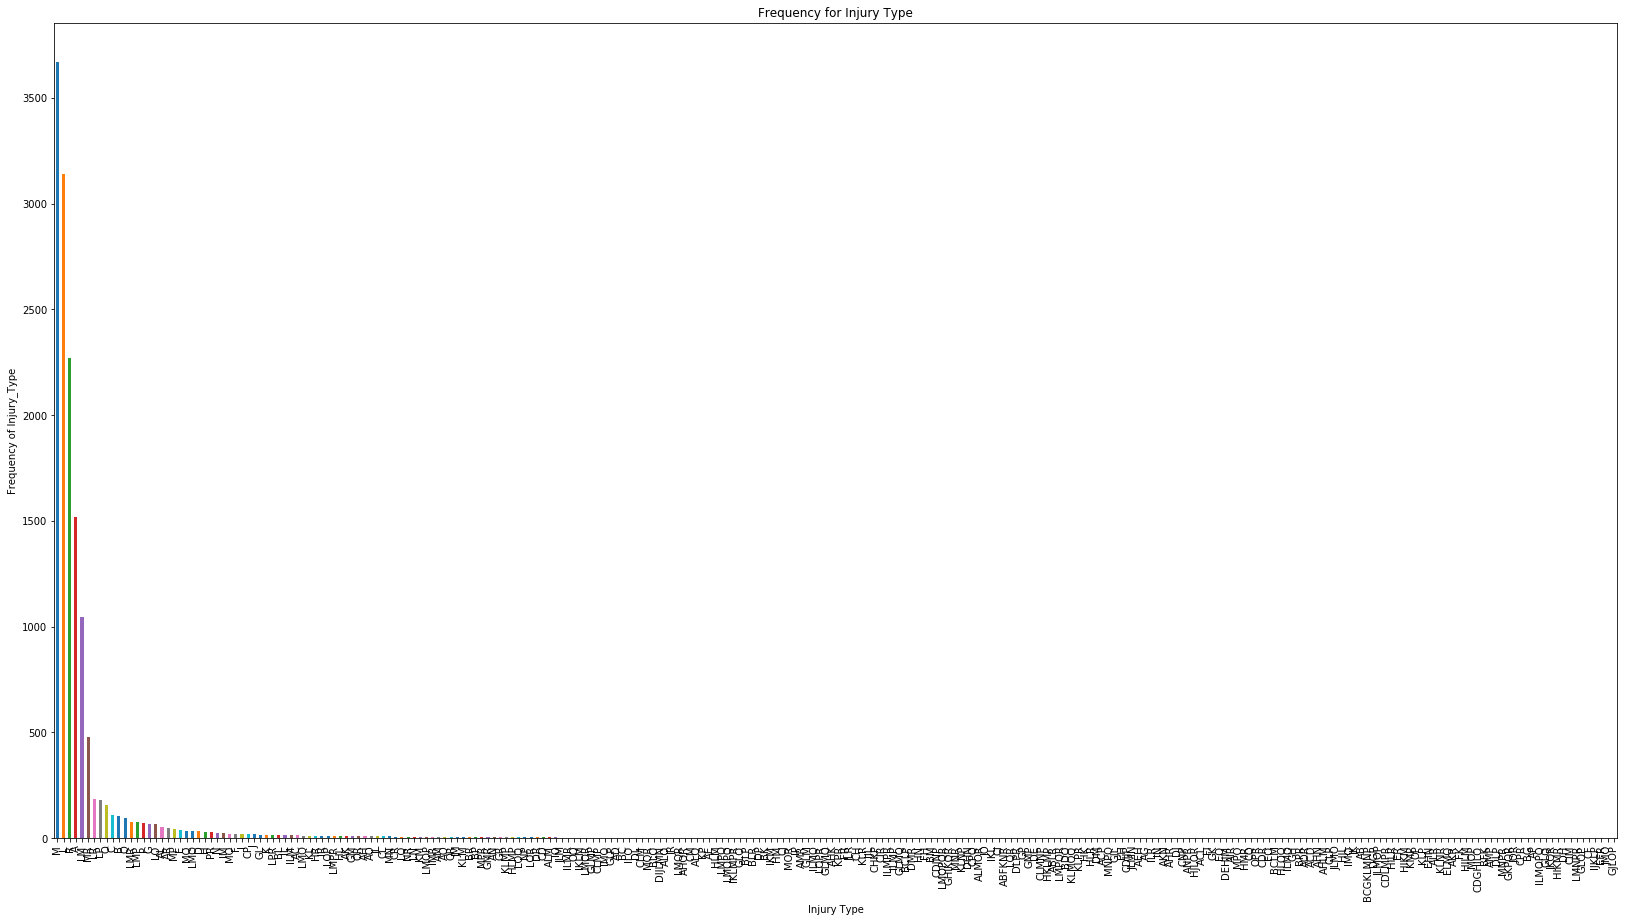

In [29]:
app_train_empty.Injury_Type.value_counts().plot(kind='bar',figsize=(28,15))
plt.Figure(figsize=(20,16), frameon=True)
plt.title('Frequency for Injury Type')
plt.xlabel('Injury Type')
plt.ylabel('Frequency of Injury_Type')
plt.savefig('Injury_Type_bar_chart', dpi=500)

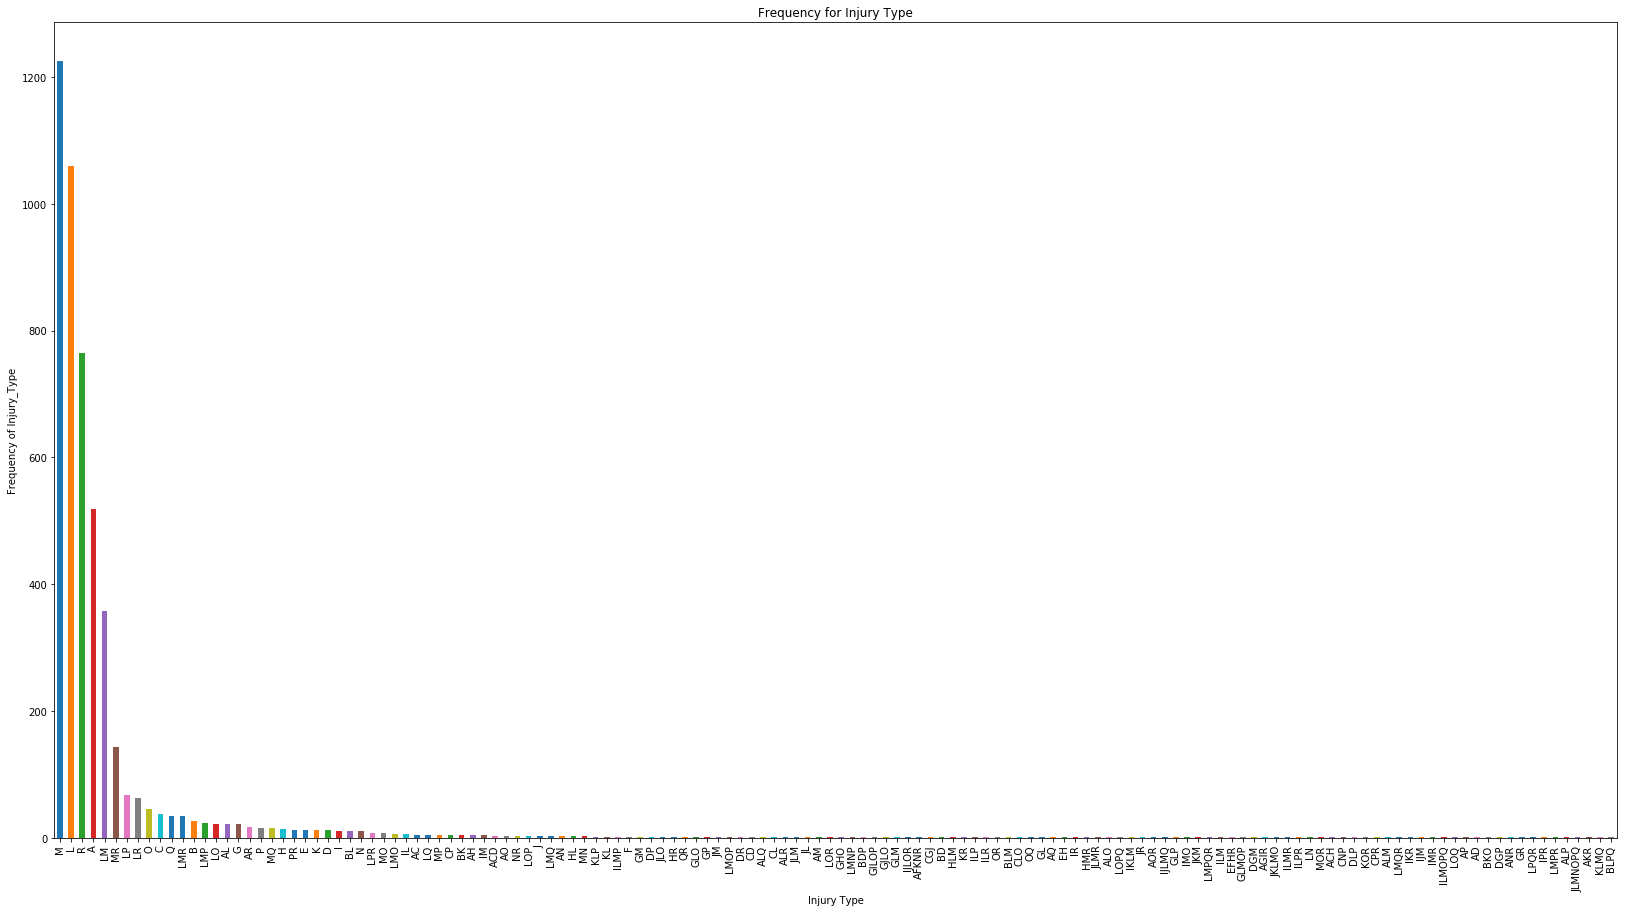

In [30]:
app_test_empty.Injury_Type.value_counts().plot(kind='bar',figsize=(28,15))
plt.Figure(figsize=(20,16), frameon=True)
plt.title('Frequency for Injury Type')
plt.xlabel('Injury Type')
plt.ylabel('Frequency of Injury_Type')
plt.savefig('Injury_Type_bar_chart1', dpi=500)


In [31]:
series = pd.value_counts(app_train_empty.Injury_Type)
mask = (series/series.sum() * 100).lt(5)
# To replace df['column'] use np.where I.e 
#df['column'] = np.where(df['column'].isin(series[mask].index),'Other',df['column'])
app_train_empty['Injury_Type']=np.where(app_train_empty['Injury_Type'].isin(series[mask].index),'Other',app_train_empty['Injury_Type'])
app_train_empty['Injury_Type'].value_counts()

M        3671
L        3138
Other    2775
R        2270
A        1516
LM       1047
Name: Injury_Type, dtype: int64

In [32]:
series = pd.value_counts(app_test_empty.Injury_Type)
mask = (series/series.sum() * 100).lt(5)
# To replace df['column'] use np.where I.e 
#df['column'] = np.where(df['column'].isin(series[mask].index),'Other',df['column'])
app_test_empty['Injury_Type']=np.where(app_test_empty['Injury_Type'].isin(series[mask].index),'Other',app_test_empty['Injury_Type'])
app_test_empty['Injury_Type'].value_counts()

M        1225
L        1060
Other     881
R         764
A         518
LM        358
Name: Injury_Type, dtype: int64

In [33]:
'''
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
app_train1[cols2] = app_train1[cols2].apply(lambda x: lb_make.fit_transform(x))
app_train_empty1= app_train_empty'''

'\nfrom sklearn.preprocessing import LabelEncoder\n\nlb_make = LabelEncoder()\napp_train1[cols2] = app_train1[cols2].apply(lambda x: lb_make.fit_transform(x))\napp_train_empty1= app_train_empty'

### Based On Insurance Type Merging

In [34]:
app_train_empty['WorkersCompAvailability'].replace('Y', 'WorksersComp', inplace=True)
app_train_empty['WorkersCompAvailability'].replace('N', 'Noworkcomp', inplace=True)
app_train_empty['CollateralSourcesAvailability'].replace('N', 'NoOtherCollateral', inplace=True)
app_train_empty['CollateralSourcesAvailability'].replace('Y', 'YesCSA', inplace=True)
app_train_empty['MedicalInsurance'].replace('Y', 'Medical', inplace=True)
app_train_empty['DisabilityInsurance'].replace('Y', 'Disability', inplace=True)
app_train_empty['SocialSecurityBenefits'].replace('Y', 'SocialSecurity', inplace=True)
app_train_empty['Medicare_Medicaid'].replace('Y', 'Medicare_Medicaid', inplace=True)
app_train_empty['OtherCollateralSources'].replace('Y', 'OtherCollateral', inplace=True)

In [35]:
app_test_empty['WorkersCompAvailability'].replace('Y', 'WorksersComp', inplace=True)
app_test_empty['WorkersCompAvailability'].replace('N', 'Noworkcomp', inplace=True)
app_test_empty['CollateralSourcesAvailability'].replace('N', 'NoOtherCollateral', inplace=True)
app_test_empty['CollateralSourcesAvailability'].replace('Y', 'YesCSA', inplace=True)
app_test_empty['MedicalInsurance'].replace('Y', 'Medical', inplace=True)
app_test_empty['DisabilityInsurance'].replace('Y', 'Disability', inplace=True)
app_test_empty['SocialSecurityBenefits'].replace('Y', 'SocialSecurity', inplace=True)
app_test_empty['Medicare_Medicaid'].replace('Y', 'Medicare_Medicaid', inplace=True)
app_test_empty['OtherCollateralSources'].replace('Y', 'OtherCollateral', inplace=True)

In [36]:
#Insurance Type

#merging 
cols = ['WorkersCompAvailability','CollateralSourcesAvailability','MedicalInsurance','DisabilityInsurance','SocialSecurityBenefits','Medicare_Medicaid','OtherCollateralSources']

app_train_empty=app_train_empty.assign(Insurance_Type=app_train_empty[cols].sum(1)).drop(cols, 1)
app_test_empty=app_test_empty.assign(Insurance_Type=app_test_empty[cols].sum(1)).drop(cols, 1)


In [37]:
#checking levels
app_train_empty['Insurance_Type'].value_counts()

NoworkcompNoOtherCollateral                                                          9058
NoworkcompYesCSAMedical                                                              2104
WorksersCompNoOtherCollateral                                                        1798
NoworkcompYesCSAMedicare_Medicaid                                                     662
WorksersCompYesCSAMedical                                                             115
NoworkcompYesCSAOtherCollateral                                                       103
NoworkcompYesCSAMedicalMedicare_Medicaid                                              102
NoworkcompYesCSAMedicalDisability                                                      61
NoworkcompYesCSAMedicalOtherCollateral                                                 55
NoworkcompYesCSA                                                                       49
NoworkcompYesCSASocialSecurity                                                         48
Noworkcomp

In [38]:
app_test_empty['Insurance_Type'].value_counts()

NoworkcompNoOtherCollateral                                          2980
NoworkcompYesCSAMedical                                               681
WorksersCompNoOtherCollateral                                         623
NoworkcompYesCSAMedicare_Medicaid                                     226
WorksersCompYesCSAMedical                                              45
NoworkcompYesCSAMedicalMedicare_Medicaid                               43
NoworkcompYesCSAOtherCollateral                                        39
NoworkcompYesCSAMedicalOtherCollateral                                 29
NoworkcompYesCSASocialSecurityMedicare_Medicaid                        20
NoworkcompYesCSAMedicalDisability                                      17
WorksersCompYesCSAMedicalDisability                                    14
NoworkcompYesCSASocialSecurity                                         13
NoworkcompYesCSAMedicalSocialSecurity                                  12
NoworkcompYesCSA                      

In [39]:
#app_train_empty['Insurance_Type'].replace('N','NoCollateralsourcesAvailable', inplace=True)
#app_test_empty['Insurance_Type'].replace('N','NoCollateralsourcesAvailable', inplace=True)


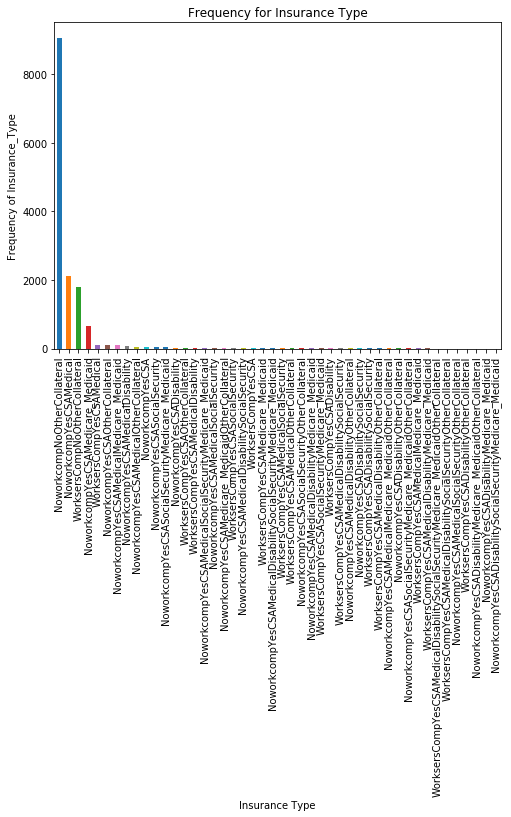

In [40]:
#checking frequency
app_train_empty.Insurance_Type.value_counts().plot(kind='bar',figsize=(8,6))
plt.Figure(figsize=(20,16), frameon=True)
plt.title('Frequency for Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Frequency of Insurance_Type')
plt.savefig('Insurance_Type_bar_chart', dpi=100)

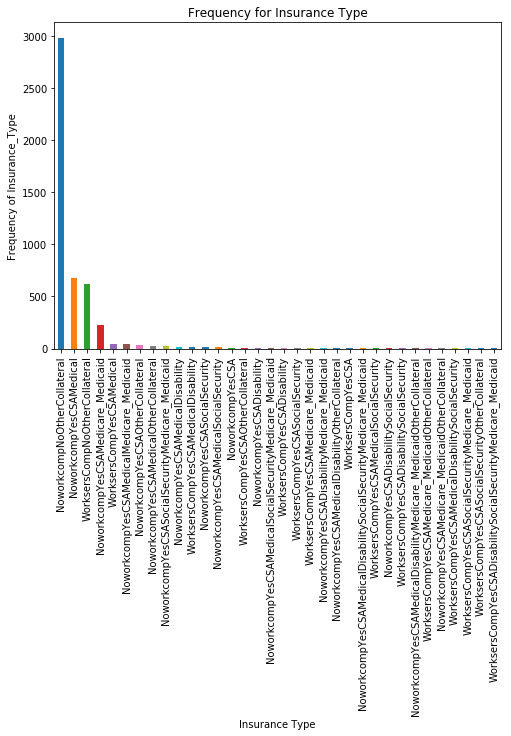

In [41]:
app_test_empty.Insurance_Type.value_counts().plot(kind='bar',figsize=(8,6))
plt.Figure(figsize=(20,16), frameon=True)
plt.title('Frequency for Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Frequency of Insurance_Type')
plt.savefig('Insurance_Type_bar_chart', dpi=100)

In [42]:
#binning based on frequency
series = pd.value_counts(app_train_empty.Insurance_Type)
mask = (series/series.sum() * 100).lt(5)
# To replace df['column'] use np.where I.e 
#df['column'] = np.where(df['column'].isin(series[mask].index),'Other',df['column'])
app_train_empty['Insurance_Type']=np.where(app_train_empty['Insurance_Type'].isin(series[mask].index),'Other',app_train_empty['Insurance_Type'])
app_train_empty['Insurance_Type'].value_counts()

NoworkcompNoOtherCollateral      9058
NoworkcompYesCSAMedical          2104
WorksersCompNoOtherCollateral    1798
Other                            1457
Name: Insurance_Type, dtype: int64

In [43]:
series = pd.value_counts(app_test_empty.Insurance_Type)
mask = (series/series.sum() * 100).lt(5)
# To replace df['column'] use np.where I.e 
#df['column'] = np.where(df['column'].isin(series[mask].index),'Other',df['column'])
app_test_empty['Insurance_Type']=np.where(app_test_empty['Insurance_Type'].isin(series[mask].index),'Other',app_test_empty['Insurance_Type'])
app_test_empty['Insurance_Type'].value_counts()

NoworkcompNoOtherCollateral      2980
NoworkcompYesCSAMedical           681
WorksersCompNoOtherCollateral     623
Other                             522
Name: Insurance_Type, dtype: int64

In [44]:
# Delete features of same insurance type as we have similar CollateralSourcesAvailability feature

In [45]:
# as even if we combile it will create a feature similar to CollateralSourcesAvailability we can drop it

#cols = ['MedicalInsurance','DisabilityInsurance','SocialSecurityBenefits','Medicare_Medicaid','OtherCollateralSources']

#app_train.drop(app_train[cols], axis=1).head()

In [46]:
app_train_empty.shape

(14417, 42)

In [47]:
app_test_empty.shape

(4806, 42)

### Based on Cause of claim

In [48]:
app_train_empty['Falls'].replace('NA','', inplace=True)
app_train_empty['Falls'].head()

0    F
1     
2     
3     
4     
Name: Falls, dtype: object

In [49]:
app_test_empty['Falls'].replace('NA','', inplace=True)
app_test_empty['Falls'].head()

0    
1    
2    
3    
4    
Name: Falls, dtype: object

In [50]:
#merging
cols3 = ['OffRoadVehicle','AirTransportation','Railway','OtherMotorVehicle','SurgicalCare','Falls','Drowning',
         'UseOfDefectiveProduct','Fire','Firearm','Pollution_ToxicExposure','Explosions',
         'UseOfAgrlMachinery','Oil_gasExtraction','OtherModeOfInjury']

app_train_empty=app_train_empty.assign(Cause_of_Claim=app_train_empty[cols3].sum(1)).drop(cols3, 1)
app_test_empty=app_test_empty.assign(Cause_of_Claim=app_test_empty[cols3].sum(1)).drop(cols3, 1)

In [51]:
app_train_empty['Cause_of_Claim'].value_counts()

D        8850
F        1907
E        1478
O        1345
H         163
A         125
I          52
DO         51
L          45
FO         32
C          31
N          30
G          30
K          30
J          26
FH         20
EF         19
EO         19
DF         17
M          16
IL         11
AD          9
CD          7
IO          6
B           6
HO          6
DE          5
DI          5
KO          4
AF          4
         ... 
DFO         2
FN          2
IN          2
FK          1
DJ          1
EJO         1
FL          1
AFO         1
DK          1
DHILN       1
FIL         1
AFH         1
DEH         1
AIKO        1
HK          1
LN          1
LO          1
MNO         1
LM          1
FLN         1
DIL         1
NO          1
ADH         1
AH          1
FKO         1
FG          1
HM          1
EFH         1
AJ          1
EHJ         1
Name: Cause_of_Claim, Length: 72, dtype: int64

In [52]:
app_test_empty['Cause_of_Claim'].value_counts()

D        2985
F         602
O         486
E         449
H          48
A          38
C          20
DO         19
N          18
L          16
I          14
J          13
K          11
G          10
FO          9
EF          8
FH          7
M           6
DF          5
B           5
CD          4
AO          3
KO          3
EO          3
AD          3
FN          2
HO          2
DHILO       2
JO          1
DHI         1
DHO         1
DJ          1
DH          1
DHILN       1
ADM         1
DFO         1
DI          1
AH          1
DL          1
HIL         1
GH          1
LN          1
AF          1
Name: Cause_of_Claim, dtype: int64

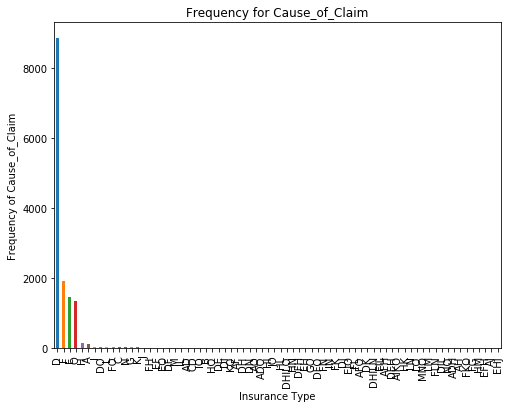

In [53]:
#checking frequency
app_train_empty.Cause_of_Claim.value_counts().plot(kind='bar',figsize=(8,6))
plt.Figure(figsize=(20,16), frameon=True)
plt.title('Frequency for Cause_of_Claim')
plt.xlabel('Insurance Type')
plt.ylabel('Frequency of Cause_of_Claim')
plt.savefig('Cause_of_Claim_bar_chart', dpi=100)

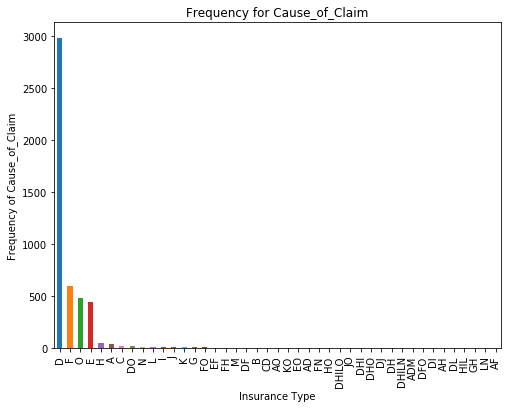

In [54]:
app_test_empty.Cause_of_Claim.value_counts().plot(kind='bar',figsize=(8,6))
plt.Figure(figsize=(20,16), frameon=True)
plt.title('Frequency for Cause_of_Claim')
plt.xlabel('Insurance Type')
plt.ylabel('Frequency of Cause_of_Claim')
plt.savefig('Cause_of_Claim_bar_chart1', dpi=100)

In [55]:
#binning based on frequency
series = pd.value_counts(app_train_empty.Cause_of_Claim)
mask = (series/series.sum() * 100).lt(5)
app_train_empty['Cause_of_Claim']=np.where(app_train_empty['Cause_of_Claim'].isin(series[mask].index),'Other',app_train_empty['Cause_of_Claim'])
app_train_empty['Cause_of_Claim'].value_counts()

D        8850
F        1907
E        1478
O        1345
Other     837
Name: Cause_of_Claim, dtype: int64

In [56]:
series = pd.value_counts(app_test_empty.Cause_of_Claim)
mask = (series/series.sum() * 100).lt(5)
app_test_empty['Cause_of_Claim']=np.where(app_test_empty['Cause_of_Claim'].isin(series[mask].index),'Other',app_test_empty['Cause_of_Claim'])
app_test_empty['Cause_of_Claim'].value_counts()


D        2985
F         602
O         486
E         449
Other     284
Name: Cause_of_Claim, dtype: int64

In [57]:
app_train_empty['Cause_of_Claim'].head()

0    F
1    D
2    D
3    E
4    D
Name: Cause_of_Claim, dtype: object

In [58]:
print("Modified Train dimensions",app_train_empty.shape)
print("Modified Train dimensions",app_test_empty.shape)

Modified Train dimensions (14417, 28)
Modified Train dimensions (4806, 28)


In [59]:
#checking frequency for Business Class

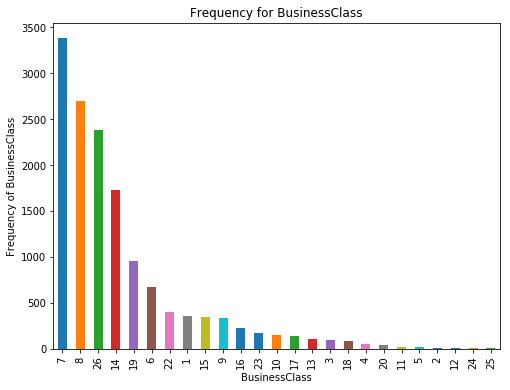

In [60]:
#checking frequency
app_train_empty.BusinessClass.value_counts().plot(kind='bar',figsize=(8,6))
plt.Figure(figsize=(20,16), frameon=True)
plt.title('Frequency for BusinessClass')
plt.xlabel('BusinessClass')
plt.ylabel('Frequency of BusinessClass')
plt.savefig('BusinessClass_bar_chart', dpi=100)

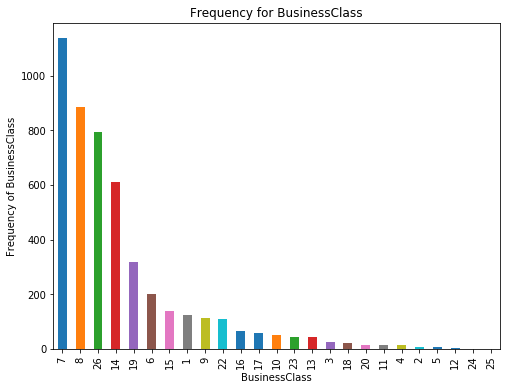

In [61]:
#checking frequency
app_test_empty.BusinessClass.value_counts().plot(kind='bar',figsize=(8,6))
plt.Figure(figsize=(20,16), frameon=True)
plt.title('Frequency for BusinessClass')
plt.xlabel('BusinessClass')
plt.ylabel('Frequency of BusinessClass')
plt.savefig('BusinessClass_bar_chart', dpi=100)

In [62]:
app_train_empty['BusinessClass'].value_counts()

7     3379
8     2693
26    2381
14    1725
19     954
6      672
22     403
1      362
15     349
9      334
16     234
23     179
10     154
17     138
13     110
3       95
18      84
4       50
20      39
11      23
5       18
2       14
12      11
24       9
25       7
Name: BusinessClass, dtype: int64

In [63]:
app_test_empty['BusinessClass'].value_counts()

7     1136
8      885
26     793
14     612
19     317
6      201
15     140
1      125
9      112
22     111
16      67
17      59
10      51
23      45
13      43
3       25
18      21
20      15
11      14
4       13
2        7
5        6
12       5
24       2
25       1
Name: BusinessClass, dtype: int64

In [64]:
#binning based on frequency
series = pd.value_counts(app_train_empty.BusinessClass)
mask = (series/series.sum() * 100).lt(5)
app_train_empty['BusinessClass']=np.where(app_train_empty['BusinessClass'].isin(series[mask].index),'Other',app_train_empty['BusinessClass'])
app_train_empty['BusinessClass'].value_counts()

7        3379
Other    3285
8        2693
26       2381
14       1725
19        954
Name: BusinessClass, dtype: int64

In [65]:
#binning based on frequency
series = pd.value_counts(app_test_empty.BusinessClass)
mask = (series/series.sum() * 100).lt(5)
app_test_empty['BusinessClass']=np.where(app_test_empty['BusinessClass'].isin(series[mask].index),'Other',app_test_empty['BusinessClass'])
app_test_empty['BusinessClass'].value_counts()

7        1136
Other    1063
8         885
26        793
14        612
19        317
Name: BusinessClass, dtype: int64

In [66]:
#checking frequency for Policy Type

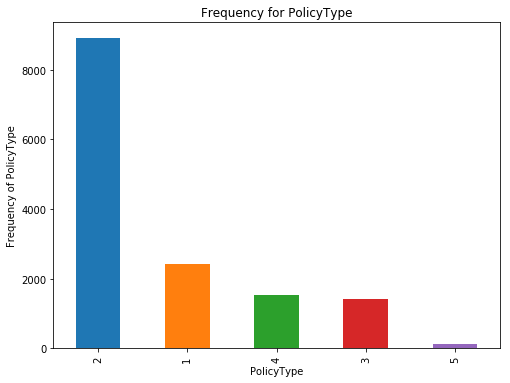

In [67]:
#checking frequency
app_train_empty.PolicyType.value_counts().plot(kind='bar',figsize=(8,6))
plt.Figure(figsize=(20,16), frameon=True)
plt.title('Frequency for PolicyType')
plt.xlabel('PolicyType')
plt.ylabel('Frequency of PolicyType')
plt.savefig('PolicyType_bar_chart', dpi=100)

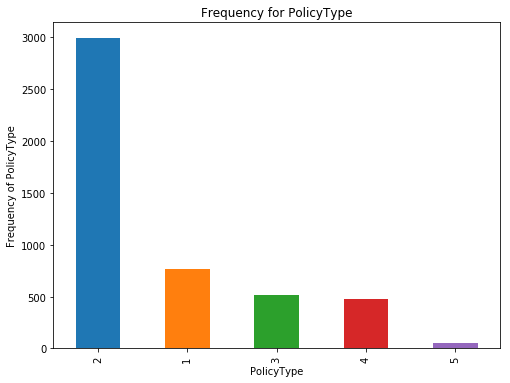

In [68]:
#checking frequency
app_test_empty.PolicyType.value_counts().plot(kind='bar',figsize=(8,6))
plt.Figure(figsize=(20,16), frameon=True)
plt.title('Frequency for PolicyType')
plt.xlabel('PolicyType')
plt.ylabel('Frequency of PolicyType')
plt.savefig('PolicyType_bar_chart1', dpi=100)

In [69]:
app_train_empty['PolicyType'].value_counts()

2    8917
1    2411
4    1545
3    1405
5     139
Name: PolicyType, dtype: int64

In [70]:
app_test_empty['PolicyType'].value_counts()

2    2997
1     767
3     513
4     474
5      55
Name: PolicyType, dtype: int64

In [71]:
#As as there are no more classes and no extra bins of less than 5% frequency so no binning is needed 

### Datatype conversion of Policy Type and Policy Form Features

In [72]:
app_train_empty['PolicyType']= app_train_empty['PolicyForm'].astype(object)
app_test_empty['PolicyType']= app_test_empty['PolicyForm'].astype(object)
app_train_empty['PolicyForm']= app_train_empty['PolicyForm'].astype(object)
app_test_empty['PolicyForm']= app_test_empty['PolicyForm'].astype(object)

In [73]:
app_train_empty['Anyothercontributors']= app_train_empty['Anyothercontributors'].astype(object)
app_test_empty['Anyothercontributors']= app_test_empty['Anyothercontributors'].astype(object)
app_train_empty['AnyMultipleInterestedparties']= app_train_empty['AnyMultipleInterestedparties'].astype(object)
app_test_empty['AnyMultipleInterestedparties']= app_test_empty['AnyMultipleInterestedparties'].astype(object)

In [74]:
app_train_empty.head()

,ClaimID,ClaimSize,Injury_Date,Date_reported,Age_Injured,Work_related_injury_status,Non_economicloss,Exemplarydamages,WhetherPrimaFacie_JointandSeveralLiability,Anyothercontributors,...,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury,Injury_Type,Insurance_Type,Cause_of_Claim
0,CLM56529,lessthan100K,3/9/2000,2000-03-23,5900,N,No,No,N,1,...,1,Y,Other,0,0,5000000,5000000,L,NoworkcompNoOtherCollateral,F
1,CLM66153,lessthan100K,12/6/2002,2002-12-10,3700,N,No,No,N,1,...,1,Y,Other,0,5000000,0,5000000,R,NoworkcompNoOtherCollateral,D
2,CLM58861,lessthan100K,10/20/2000,2000-11-02,3700,N,No,No,N,1,...,1,Y,Other,0,0,5000000,5000000,M,NoworkcompNoOtherCollateral,D
3,CLM67972,200KandAbove,8/9/2003,2003-08-11,1600,,No,No,N,2,...,2,N,Other,0,1000000,3000000,1000000,A,NoworkcompNoOtherCollateral,E
4,CLM69075,lessthan100K,2/25/2004,2004-02-26,5200,,No,No,N,1,...,1,N,Other,0,1000000,0,1000000,L,NoworkcompNoOtherCollateral,D


### Datatype conversion of Date Features

In [75]:
#converting into datetime formats in train
app_train_empty['Injury_Date'] =app_train_empty['Injury_Date'].apply(pd.to_datetime, errors = 'coerce')
app_train_empty['Date_reported'] =app_train_empty['Date_reported'].apply(pd.to_datetime, errors = 'coerce')

#converting into datetime formats in train
app_test_empty['Injury_Date'] =app_test_empty['Injury_Date'].apply(pd.to_datetime, errors = 'coerce')
app_test_empty['Date_reported'] =app_test_empty['Date_reported'].apply(pd.to_datetime, errors = 'coerce')


In [76]:
app_train_empty['Injury_Date'].dtypes

dtype('<M8[ns]')

In [77]:
#calculating difference between two date reported and injury date in train
app_train_empty['time_taken_to report']=(((app_train_empty['Date_reported']-app_train_empty['Injury_Date']).astype('timedelta64[h]'))/24).astype(np.int64)

In [78]:
#calculating difference between two date reported and injury date in train
app_test_empty['time_taken_to report']=(((app_test_empty['Date_reported']-app_test_empty['Injury_Date']).astype('timedelta64[h]'))/24).astype(np.int64)

In [79]:
app_train_empty['time_taken_to report'].head()

0    14
1     4
2    13
3     2
4     1
Name: time_taken_to report, dtype: int64

### Modifing Age Column

In [80]:
app_train_empty['Age_Injured'] =app_train_empty['Age_Injured']/100

In [81]:
app_train_empty['Age_Injured'].head()

0    59.0
1    37.0
2    37.0
3    16.0
4    52.0
Name: Age_Injured, dtype: float64

In [82]:
app_test_empty['Age_Injured'] =app_test_empty['Age_Injured']/100

In [83]:
app_test_empty['Age_Injured'].head()

0    46.0
1    31.0
2    14.0
3    44.0
4    42.0
Name: Age_Injured, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E475E24F98>,
      dtype=object)

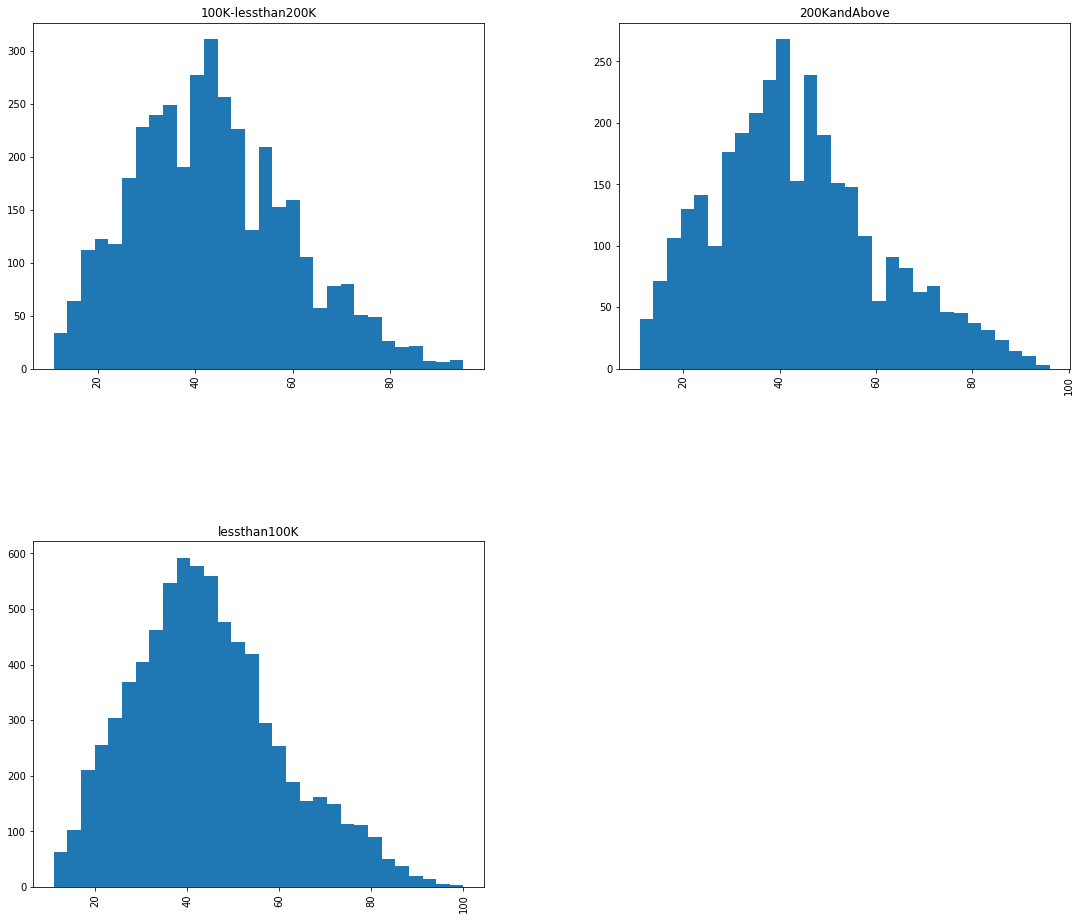

In [85]:
#Age Injured by Claimsize 
app_train_empty.hist(column="Age_Injured",by="ClaimSize",bins=30, figsize=(18,16))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E45A3B4E10>]],
      dtype=object)

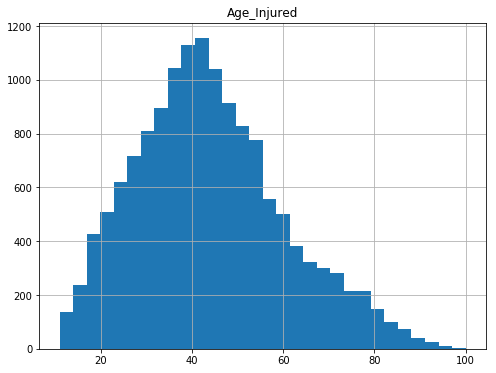

In [86]:
app_train_empty.hist(column="Age_Injured",bins=30, figsize=(8,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4596A5F60>]],
      dtype=object)

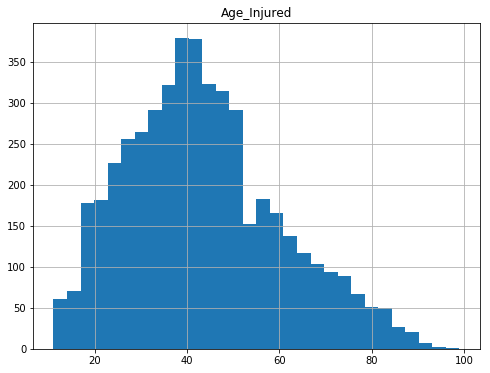

In [87]:
app_test_empty.hist(column="Age_Injured",bins=30, figsize=(8,6))

In [88]:
app_train_empty['ClaimSize']=app_train_empty['ClaimSize'].astype('category')

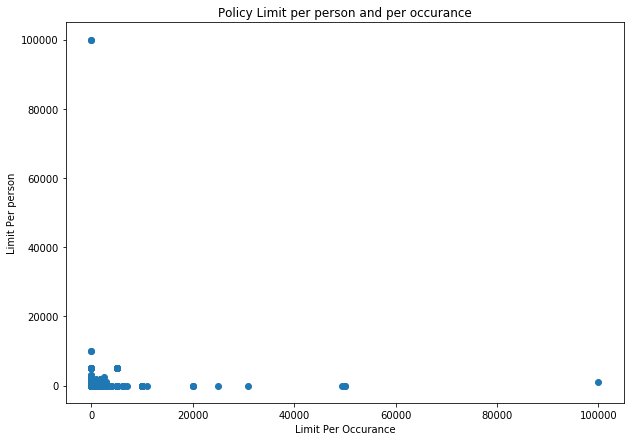

In [89]:
plt.figure(figsize = (10,7))

plt.scatter(x = app_train_empty.PerOccurrence_PolicyLimit/1000,y = app_train_empty.Perperson_Policylimit/1000)
plt.title('Policy Limit per person and per occurance')
plt.xlabel('Limit Per Occurance')
plt.ylabel('Limit Per person')
plt.show()

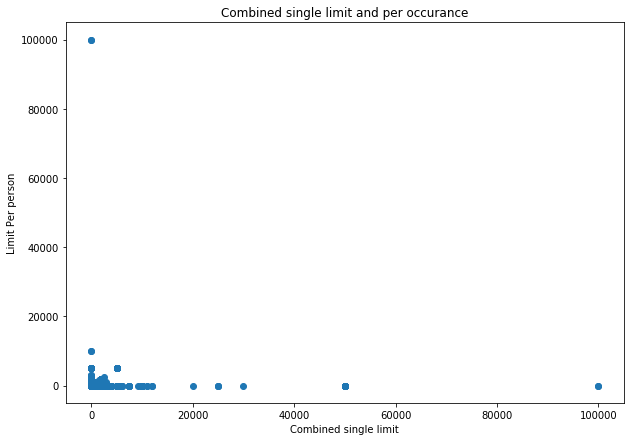

In [90]:
plt.figure(figsize = (10,7))

plt.scatter(x = app_train_empty.CombinedSingleLimit/1000,y = app_train_empty.Perperson_Policylimit/1000)
plt.title('Combined single limit and per occurance')
plt.xlabel('Combined single limit')
plt.ylabel('Limit Per person')
plt.show()

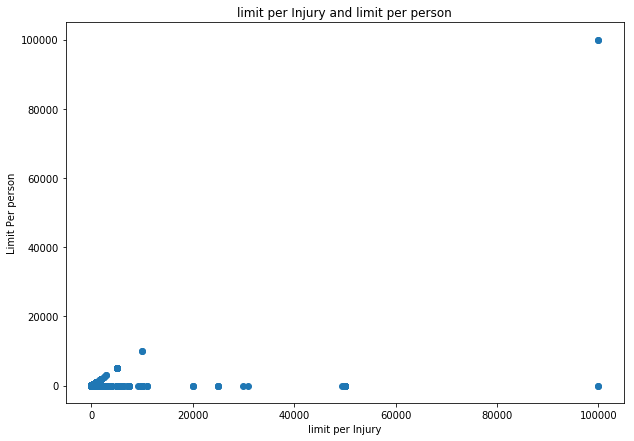

In [91]:
plt.figure(figsize = (10,7))

plt.scatter(x = app_train_empty.PolicyLimitPerInjury/1000,y = app_train_empty.Perperson_Policylimit/1000)
plt.title('limit per Injury and limit per person')
plt.xlabel('limit per Injury')
plt.ylabel('Limit Per person')
plt.show()

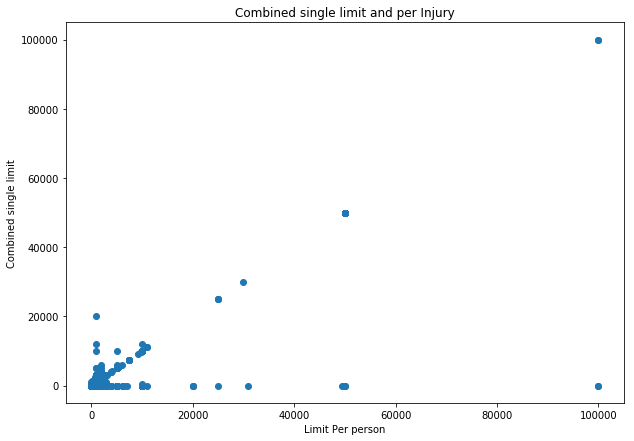

In [92]:
plt.figure(figsize = (10,7))

plt.scatter(x = app_train_empty.PolicyLimitPerInjury/1000,y = app_train_empty.CombinedSingleLimit/1000)
plt.title('Combined single limit and per Injury')
plt.ylabel('Combined single limit')
plt.xlabel('Limit Per person')
plt.show()

### Dropping unnecessary columns

##### Dropping basic ID and target variables from train and test

In [93]:
#save ClaimID in temoprary variable and drop it from train
app_train_ID = app_train_empty['ClaimID']
app_train_ID.shape

#save ClaimID in temoprary variable and drop it from test
app_test_ID = app_test_empty['ClaimID']
app_test_ID.shape

#save Claimsize in target variable and drop it from train
app_train_target = app_train_empty['ClaimSize']
app_train_target.shape

#there was something wrong in test.csv provided so read test ClaimID from samplesubmission.csv
#dropping claimsize, claimID, PolicyID column from train and test 
#dropping claimsize column from test as it is read from sample csv 
#dropping Date columns

app_train_empty = app_train_empty.drop(['ClaimID', 'ClaimSize', 'PolicyID', 'Injury_Date', 'Date_reported'], axis =1)
app_test_empty = app_test_empty.drop(['ClaimID', 'ClaimSize', 'PolicyID', 'Injury_Date', 'Date_reported'], axis =1)


### Dropping Features with more missing data

In [94]:
#most of the rows are missing so deleted.
#app_train_empty = app_train_empty.drop(['Work_related_injury_status'], axis =1)
#app_test_empty = app_test_empty.drop(['Work_related_injury_status'], axis =1)

In [95]:
#most of the rows are missing and no proper information so deleted.
#app_train_empty = app_train_empty.drop(['Match_Multiclaimant_multiInterestedparties_claim'], axis =1)
#app_test_empty = app_test_empty.drop(['Match_Multiclaimant_multiInterestedparties_claim'], axis =1)

In [96]:
print("Modified Train dimensions",app_train_empty.shape)
print("Modified Train dimensions",app_test_empty.shape)

Modified Train dimensions (14417, 24)
Modified Train dimensions (4806, 24)


### Writing to new csv for manual check

In [97]:
#to manual cross check
app_train_empty.to_csv('newtrain.csv', sep=',', index=False)

In [98]:
#Summary statistics
app_train_empty.describe()

,Age_Injured,PrimaFacie_percentagefault_injured,PrimaFacie_percentagefault_insured,PrimaFacie_percentagefault_otherinsured,PrimaFacie_percentagefault_uninsured,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury,time_taken_to report
count,14417.000000,14417.000000,14417.000000,14417.000000,14417.000000,1.441700e+04,1.441700e+04,1.441700e+04,1.441700e+04,14417.000000
mean,43.808143,6.508219,87.336547,5.361518,0.782618,1.088967e+05,5.543583e+05,1.141678e+06,1.515379e+06,44.778733
std,16.458068,16.579278,24.473152,17.594942,6.793993,1.229854e+06,1.607942e+06,4.300206e+06,4.497684e+06,84.001181
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04,0.000000
25%,32.000000,0.000000,90.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+06,1.000000
50%,42.000000,0.000000,100.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+06,1.000000e+06,4.000000
75%,54.000000,0.000000,100.000000,0.000000,0.000000,0.000000e+00,1.000000e+06,1.000000e+06,1.000000e+06,35.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+08,1.000000e+08,1.000001e+08,1.000001e+08,365.000000


In [99]:
app_test_empty.describe()

,Age_Injured,PrimaFacie_percentagefault_injured,PrimaFacie_percentagefault_insured,PrimaFacie_percentagefault_otherinsured,PrimaFacie_percentagefault_uninsured,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury,time_taken_to report
count,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4.806000e+03,4.806000e+03,4.806000e+03,4.806000e+03,4806.000000
mean,43.379318,6.977736,86.719725,5.528298,0.774241,9.365091e+04,5.475019e+05,1.102712e+06,1.471690e+06,45.597794
std,16.722784,17.613509,25.277735,17.914606,6.774256,3.355473e+05,1.372524e+06,4.073767e+06,4.125732e+06,84.298572
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04,0.000000
25%,31.000000,0.000000,85.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+06,1.000000
50%,42.000000,0.000000,100.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,7.500160e+05,1.000000e+06,5.000000
75%,53.000000,0.000000,100.000000,0.000000,0.000000,0.000000e+00,1.000000e+06,1.000000e+06,1.000000e+06,37.000000
max,99.000000,100.000000,100.000000,100.000000,100.000000,5.000000e+06,4.000000e+07,5.000000e+07,5.000000e+07,364.000000


In [100]:
app_train_empty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14417 entries, 0 to 14416
Data columns (total 24 columns):
Age_Injured                                         14417 non-null float64
Work_related_injury_status                          14417 non-null object
Non_economicloss                                    14417 non-null object
Exemplarydamages                                    14417 non-null object
WhetherPrimaFacie_JointandSeveralLiability          14417 non-null object
Anyothercontributors                                14417 non-null object
AnyMultipleInterestedparties                        14417 non-null object
Match_Multiclaimant_multiInterestedparties_claim    14417 non-null object
PrimaFacie_percentagefault_injured                  14417 non-null int64
PrimaFacie_percentagefault_insured                  14417 non-null int64
PrimaFacie_percentagefault_otherinsured             14417 non-null int64
PrimaFacie_percentagefault_uninsured                14417 non-null int64
Policy

In [101]:
#retreiving the catagorical columns
category_columns= app_train_empty.select_dtypes(include='object').columns

In [102]:
#Converting Datatype of categorical variables

In [103]:
app_train_empty[category_columns] = app_train_empty[category_columns].apply(lambda x: x.astype('category'))

In [104]:
app_test_empty[category_columns] = app_test_empty[category_columns].apply(lambda x: x.astype('category'))

In [105]:
app_train_empty['Age_Injured'].value_counts()

40.0     433
43.0     399
35.0     392
45.0     386
41.0     379
42.0     377
38.0     356
47.0     347
39.0     339
33.0     338
37.0     332
46.0     330
44.0     326
36.0     319
50.0     318
48.0     303
29.0     289
32.0     283
34.0     274
52.0     272
54.0     269
30.0     267
53.0     266
49.0     264
28.0     257
31.0     254
55.0     243
51.0     238
27.0     231
26.0     230
        ... 
15.0      77
77.0      77
75.0      75
78.0      75
74.0      72
76.0      67
14.0      64
79.0      64
80.0      54
81.0      53
13.0      51
12.0      47
82.0      41
11.0      39
86.0      37
83.0      36
85.0      33
84.0      30
88.0      21
90.0      18
87.0      14
91.0      12
93.0      11
89.0      11
95.0       8
94.0       7
92.0       6
98.0       3
96.0       2
100.0      1
Name: Age_Injured, Length: 88, dtype: int64

In [106]:
#as there are no float values
#app_train_empty['Age_Injured']= app_train_empty['Age_Injured'].astype(np.int64)
app_test_empty['Age_Injured']= app_test_empty['Age_Injured'].astype(np.int64)

In [107]:
app_test_empty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4806 entries, 0 to 4805
Data columns (total 24 columns):
Age_Injured                                         4806 non-null int64
Work_related_injury_status                          4806 non-null category
Non_economicloss                                    4806 non-null category
Exemplarydamages                                    4806 non-null category
WhetherPrimaFacie_JointandSeveralLiability          4806 non-null category
Anyothercontributors                                4806 non-null category
AnyMultipleInterestedparties                        4806 non-null category
Match_Multiclaimant_multiInterestedparties_claim    4806 non-null category
PrimaFacie_percentagefault_injured                  4806 non-null int64
PrimaFacie_percentagefault_insured                  4806 non-null int64
PrimaFacie_percentagefault_otherinsured             4806 non-null int64
PrimaFacie_percentagefault_uninsured                4806 non-null int64
PolicyTy

In [108]:
#to manual cross check
app_train_empty.to_csv('newtrain.csv', sep=',', index=False)
app_test_empty.to_csv('newtest.csv', sep=',', index=False)

## Train and test split

In [109]:
X_train, X_val, y_train, y_val = train_test_split(app_train_empty, app_train_target, test_size = 0.25, random_state = 42)

## standardization

In [110]:
numeric_columns= app_train_empty.select_dtypes(include='int64').columns
X_train1=X_train[numeric_columns]

In [111]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10812 entries, 3402 to 7270
Data columns (total 9 columns):
PrimaFacie_percentagefault_injured         10812 non-null int64
PrimaFacie_percentagefault_insured         10812 non-null int64
PrimaFacie_percentagefault_otherinsured    10812 non-null int64
PrimaFacie_percentagefault_uninsured       10812 non-null int64
Perperson_Policylimit                      10812 non-null int64
PerOccurrence_PolicyLimit                  10812 non-null int64
CombinedSingleLimit                        10812 non-null int64
PolicyLimitPerInjury                       10812 non-null int64
time_taken_to report                       10812 non-null int64
dtypes: int64(9)
memory usage: 844.7 KB


In [112]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(X_train[numeric_columns])
X_train[numeric_columns] = standardizer.transform(X_train[numeric_columns])
#print("Mean",int(np.mean(train_scaled)))
#print("SD",int(np.std(train_scaled)))

In [113]:
X_train.shape

(10812, 24)

In [114]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(X_val[numeric_columns])
X_val[numeric_columns] = standardizer.transform(X_val[numeric_columns])
#print("Mean",int(np.mean(val_scaled)))
#print("SD",int(np.std(val_scaled)))

In [115]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(app_test_empty[numeric_columns])
app_test_empty[numeric_columns] = standardizer.transform(app_test_empty[numeric_columns])
#print("Mean",int(np.mean(test_scaled)))
#print("SD",int(np.std(test_scaled)))

## Dummification

In [121]:
X_train= pd.get_dummies(X_train, drop_first=True,dummy_na=True )
X_val= pd.get_dummies(X_val, drop_first=True,dummy_na=True)
app_test_empty= pd.get_dummies(app_test_empty, drop_first=True ,dummy_na=True)

In [122]:
print("Modified Train dimensions",X_train.shape)
print("Modified Train dimensions",X_val.shape)
print("Modified Train dimensions",app_test_empty.shape)

Modified Train dimensions (10812, 54)
Modified Train dimensions (3605, 54)
Modified Train dimensions (4806, 54)


# Model Building

In [123]:
#label encode target variable
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
tar = lab_enc.fit_transform(y_train)
tar_val = lab_enc.fit_transform(y_val)

In [144]:
#using gradient boosting method called Catboost which will accept catagorical variables
model = CatBoostClassifier(iterations=80, learning_rate=0.05, depth=6, loss_function='MultiClass',
                           boosting_type='Ordered', bagging_temperature= 0.5,thread_count=10)
# Fit model
model.fit(X_train, tar)


0:	learn: -1.0729635	total: 130ms	remaining: 10.2s
1:	learn: -1.0507964	total: 261ms	remaining: 10.2s
2:	learn: -1.0305656	total: 470ms	remaining: 12.1s
3:	learn: -1.0136916	total: 686ms	remaining: 13s
4:	learn: -0.9978127	total: 888ms	remaining: 13.3s
5:	learn: -0.9821136	total: 1.08s	remaining: 13.3s
6:	learn: -0.9693973	total: 1.28s	remaining: 13.3s
7:	learn: -0.9573653	total: 1.47s	remaining: 13.2s
8:	learn: -0.9459379	total: 1.67s	remaining: 13.2s
9:	learn: -0.9351589	total: 1.87s	remaining: 13.1s
10:	learn: -0.9252708	total: 2.05s	remaining: 12.9s
11:	learn: -0.9169068	total: 2.25s	remaining: 12.8s
12:	learn: -0.9095132	total: 2.46s	remaining: 12.7s
13:	learn: -0.9016349	total: 2.66s	remaining: 12.6s
14:	learn: -0.8945988	total: 2.86s	remaining: 12.4s
15:	learn: -0.8889538	total: 3.04s	remaining: 12.2s
16:	learn: -0.8820848	total: 3.22s	remaining: 11.9s
17:	learn: -0.8769719	total: 3.43s	remaining: 11.8s
18:	learn: -0.8714907	total: 3.62s	remaining: 11.6s
19:	learn: -0.8646968	to

In [145]:
preds_class_train = model.predict(X_train)
# Get predicted probabilities for each class
preds_proba_train = model.predict_proba(X_train)
# Get predicted RawFormulaVal
preds_raw_train = model.predict(X_train, prediction_type='Class') 


In [146]:
preds_class = model.predict(X_val)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(X_val)
# Get predicted RawFormulaVal
preds_raw = model.predict(X_val, prediction_type='Class') 

In [147]:
preds_raw

array([[0.],
       [2.],
       [2.],
       ...,
       [2.],
       [1.],
       [2.]])

In [148]:
print ('Accuracy:', accuracy_score(tar, preds_raw_train))
print ('Accuracy:', accuracy_score(tar_val, preds_raw))

Accuracy: 0.685072142064373
Accuracy: 0.6826629680998613


# Random Forest

In [ ]:
np.random.seed(1234)

In [194]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_estimators=100, criterion='gini',n_jobs=10, 
                             random_state=2,max_depth=8, max_features=20,bootstrap=True)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train, tar)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=10,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [195]:
predicted_rf = clf.predict(X_train)
preds1=clf.predict(X_val)
print ('Accuracy:', accuracy_score(tar, predicted_rf))
print ('Accuracy:', accuracy_score(tar_val, preds1))


Accuracy: 0.7166111727709952
Accuracy: 0.6957004160887656


In [226]:
clf.feature_importances_

array([2.28489807e-02, 2.34976708e-02, 7.52496025e-02, 1.91561175e-02,
       2.02301582e-03, 2.59728033e-03, 2.12320942e-02, 1.45368831e-02,
       1.82565536e-02, 3.20562503e-02, 3.55751197e-03, 7.14574728e-03,
       0.00000000e+00, 4.32165895e-03, 0.00000000e+00, 4.19890022e-05,
       0.00000000e+00, 1.46197799e-04, 0.00000000e+00, 7.11672546e-03,
       0.00000000e+00, 8.14772942e-03, 0.00000000e+00, 6.88038849e-04,
       4.40446158e-04, 2.24414664e-03, 0.00000000e+00, 4.59852361e-03,
       0.00000000e+00, 3.99401279e-03, 0.00000000e+00, 2.15166660e-03,
       0.00000000e+00, 5.11546445e-03, 2.67914674e-03, 2.69138643e-03,
       1.71364215e-03, 2.66072474e-03, 0.00000000e+00, 5.29711617e-02,
       2.72296846e-01, 4.84366765e-02, 1.78879987e-01, 5.56634862e-02,
       0.00000000e+00, 2.66259711e-02, 2.62384519e-02, 8.27426926e-03,
       0.00000000e+00, 1.43342742e-02, 1.42994152e-02, 3.51514617e-03,
       7.55510716e-03, 0.00000000e+00])

## Extract important features

In [225]:
names= X_train.columns
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.2723, 'Injury_Type_LM'), (0.1789, 'Injury_Type_Other'), (0.0752, 'PrimaFacie_percentagefault_insured'), (0.0557, 'Injury_Type_R'), (0.053, 'Injury_Type_L'), (0.0484, 'Injury_Type_M'), (0.0321, 'time_taken_to report'), (0.0266, 'Insurance_Type_NoworkcompYesCSAMedical'), (0.0262, 'Insurance_Type_Other'), (0.0235, 'PrimaFacie_percentagefault_injured'), (0.0228, 'Age_Injured'), (0.0212, 'PerOccurrence_PolicyLimit'), (0.0192, 'PrimaFacie_percentagefault_otherinsured'), (0.0183, 'PolicyLimitPerInjury'), (0.0145, 'CombinedSingleLimit'), (0.0143, 'Cause_of_Claim_F'), (0.0143, 'Cause_of_Claim_E'), (0.0083, 'Insurance_Type_WorksersCompNoOtherCollateral'), (0.0081, 'AnyMultipleInterestedparties_1.0'), (0.0076, 'Cause_of_Claim_Other'), (0.0071, 'Work_related_injury_status_Y'), (0.0071, 'Anyothercontributors_2.0'), (0.0051, 'BusinessClass_19'), (0.0046, 'PolicyType_2.0'), (0.0043, 'Non_economicloss_Yes'), (0.004, 'PolicyForm_2.0'), (0.0036, 'Work_related_injury_s

In [247]:
impf=sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), names), 
             reverse=True)
impf = pd.DataFrame(impf, index=None)

In [248]:
impf

,0,1
0,0.2723,Injury_Type_LM
1,0.1789,Injury_Type_Other
2,0.0752,PrimaFacie_percentagefault_insured
3,0.0557,Injury_Type_R
4,0.0530,Injury_Type_L
5,0.0484,Injury_Type_M
6,0.0321,time_taken_to report
7,0.0266,Insurance_Type_NoworkcompYesCSAMedical
8,0.0262,Insurance_Type_Other
9,0.0235,PrimaFacie_percentagefault_injured


### Build Random forest on important features

In [281]:
impf1 = impf[1]
impf1=impf1[0:28]

In [282]:
np.random.seed(12345)

In [343]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_estimators=100, criterion='gini',n_jobs=10, 
                             random_state=3,max_depth=10, max_features=23,bootstrap=True, 
                             min_samples_leaf=4,oob_score=True)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)

clf.fit(X_train[impf1], tar)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=23, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=10,
            oob_score=True, random_state=3, verbose=0, warm_start=False)

In [344]:
predicted_rf = clf.predict(X_train[impf1])
preds1=clf.predict(X_val[impf1])
print ('Accuracy:', accuracy_score(tar, predicted_rf))
print ('Accuracy:', accuracy_score(tar_val, preds1))


Accuracy: 0.733999260081391
Accuracy: 0.7040221914008322


## Decision Trees

In [347]:
from sklearn.tree import DecisionTreeClassifier 
clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 10, min_samples_leaf = 8) 
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=10, min_samples_leaf=8) 
  
# Performing training 
clf_entropy.fit(X_train, y_train)
clf_gini.fit(X_train, y_train) 

predicted_DT_gini = clf_gini.predict(X_train)
predicted_DT_entropy = clf_entropy.predict(X_train)

preds1_gini=clf_gini.predict(X_val)
preds1_entropy=clf_entropy.predict(X_val)


In [348]:
print ('Accuracy train gini:', accuracy_score(y_train, predicted_DT_gini))
print ('Accuracy val gini:', accuracy_score(y_val, preds1_gini))

print ('Accuracy train entropy:', accuracy_score(y_train, predicted_DT_entropy))
print ('Accuracy val entropy:', accuracy_score(y_val, preds1_entropy))


Accuracy train gini: 0.6994080651128376
Accuracy val gini: 0.6635228848821082
Accuracy train entropy: 0.7154088050314465
Accuracy val entropy: 0.6887656033287102


## Logistic Regression

In [209]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [211]:
predicted_lr = lr.predict(X_train)
preds_val_lr=lr.predict(X_val)
print ('Accuracy:', accuracy_score(y_train, predicted_lr))
print ('Accuracy:', accuracy_score(y_val, preds_val_lr))

Accuracy: 0.6802626711061783
Accuracy: 0.6798890429958391


## Multinom Regression

In [213]:
mul_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
predicted_mlr = mul_lr.predict(X_train)
preds_val_mlr=mul_lr.predict(X_val)
print ('Accuracy:', accuracy_score(y_train, predicted_mlr))
print ('Accuracy:', accuracy_score(y_val, preds_val_mlr))

Accuracy: 0.6838697743248243
Accuracy: 0.6807212205270458


## SVM

In [214]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf_svm = SVC(kernel='linear', gamma=5) 
  
# fitting x samples and y classes 
clf_svm.fit(X_train, y_train)
predicted_svm = clf_svm.predict(X_train)
preds_val_svm=clf_svm.predict(X_val)
print ('Accuracy:', accuracy_score(y_train, predicted_svm))
print ('Accuracy:', accuracy_score(y_val, preds_val_svm))

Accuracy: 0.67055123936367
Accuracy: 0.6624133148404993


## xgboost

In [218]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [219]:
predicted_svm = clf_svm.predict(X_train)
preds_val_svm=clf_svm.predict(X_val)
print ('Accuracy:', accuracy_score(y_train, predicted_svm))
print ('Accuracy:', accuracy_score(y_val, preds_val_svm))

Accuracy: 0.67055123936367
Accuracy: 0.6624133148404993
